## EDA - Spotify Data 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/spotify-2023.csv', encoding='ISO-8859-1')

## Data Description

- **track_name**: Name of the song
- **artist(s)_name**: Name of the artist(s) of the song
- **artist_count**: Number of artists contributing to the song
- **released_year**: Year when the song was released
- **released_month**: Month when the song was released
- **released_day**: Day of the month when the song was released
- **in_spotify_playlists**: Number of Spotify playlists the song is included in
- **in_spotify_charts**: Presence and rank of the song on Spotify charts
- **streams**: Total number of streams on Spotify
- **in_apple_playlists**: Number of Apple Music playlists the song is included in
- **in_apple_charts**: Presence and rank of the song on Apple Music charts
- **in_deezer_playlists**: Number of Deezer playlists the song is included in
- **in_deezer_charts**: Presence and rank of the song on Deezer charts
- **in_shazam_charts**: Presence and rank of the song on Shazam charts
- **bpm**: Beats per minute, a measure of song tempo
- **key**: Key of the song
- **mode**: Mode of the song (major or minor)
- **danceability_%**: Percentage indicating how suitable the song is for dancing
- **valence_%**: Positivity of the song's musical content
- **energy_%**: Perceived energy level of the song
- **acousticness_%**: Amount of acoustic sound in the song
- **instrumentalness_%**: Amount of instrumental content in the song
- **liveness_%**: Presence of live performance elements
- **speechiness_%**: Amount of spoken words in the song


In [4]:
print("Liczba wierszy i kolumn:", df.shape)

Liczba wierszy i kolumn: (953, 24)


In [5]:
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Widać, że kolumny track_name, artist(s)_name, key, mode należy przekształcić do stringa,
a kolumny streams, in_deezer_playlists, in_shazam_charts  należy przekształcić do numeric

In [8]:
convert_to_string = ['track_name', 'artist(s)_name', 'key', 'mode']
df[convert_to_string ] = df[convert_to_string ].astype('string')

In [9]:
convert_to_numeric = ['streams', 'in_deezer_playlists', 'in_shazam_charts']
df[convert_to_numeric] = df[convert_to_numeric].apply(pd.to_numeric, errors='coerce')

In [10]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Pomysł: in_shazam_charts NA możemy zastąpić 0 - jeśli są braki danych to możemy przyjąć, że po prostu tam się nie pojawił
key NA możemy zastąpić zgodnie z rozkładem występowania key 

In [14]:
df['key'].value_counts()

C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: key, dtype: Int64

In [15]:
key_counts = df['key'].value_counts(normalize=True)

In [17]:
key_counts

C#     0.13986
G     0.111888
G#    0.106061
F      0.10373
B     0.094406
D     0.094406
A     0.087413
F#    0.085082
E     0.072261
A#    0.066434
D#    0.038462
Name: key, dtype: Float64

Zastąpienie brakujących keys wartościami wybranymi losowo

In [21]:
missing_keys_count = df['key'].isna().sum()
missing_keys = np.random.choice(key_counts.index, size=missing_keys_count, p=key_counts.values)
df.loc[df['key'].isna(), 'key'] = missing_keys

In [22]:
df['key'].value_counts()

C#    135
G     107
G#    102
F      97
B      89
D      88
F#     83
A      79
E      69
A#     69
D#     35
Name: key, dtype: Int64

Zastąpienie braków danych w kolumnie 'in_shazam_charts' wartościami 0

In [26]:
missing_data = df['in_shazam_charts'].isna().sum()
missing_data = 0
df.loc[df['in_shazam_charts'].isna(), 'in_shazam_charts'] = missing_data

In [27]:
df['in_shazam_charts'].isna().sum()

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    string 
 1   artist(s)_name        953 non-null    string 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   874 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

Po konwersji na odpowidnie typy wciąż mamy braki danych w kolumnie 'in_deezer_playlists ','in_shazam_charts' i 'streams' więc zastąpimy je 0.

In [29]:
def replace_missing_with_zero(df, column_name):
    """
    Zastępuje brakujące wartości w określonej kolumnie ramki danych zerami.

    Args:
    - df (DataFrame): Ramka danych.
    - column_name (str): Nazwa kolumny, w której należy zastąpić brakujące wartości zerami.
    """
    missing_data = 0
    df.loc[df[column_name].isna(), column_name] = missing_data


In [30]:
replace_missing_with_zero(df, 'in_shazam_charts')
replace_missing_with_zero(df, 'in_deezer_playlists')
replace_missing_with_zero(df, 'streams')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    string 
 1   artist(s)_name        953 non-null    string 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

In [32]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.135979e+08,67.812172,51.908709,100.643232,2.666317,48.115425,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668039e+08,86.441493,50.630241,173.887239,6.035599,123.242346,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.413817e+08,13.000000,7.000000,9.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.902286e+08,34.000000,38.000000,31.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,100.000000,2.000000,32.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,58.000000,953.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [33]:
numeric_cols = ['artist_count',	'released_year', 'released_month', 'released_day', 'in_spotify_playlists',
                'in_spotify_charts', 'streams',	'in_apple_playlists', 'in_apple_charts',
                'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%',
                'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

In [34]:
corr_matrix = df[numeric_cols].corr(method='pearson')

In [35]:
corr_matrix

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.087586,0.037995,-0.017549,-0.101966,-0.018507,-0.135783,-0.051074,-0.088597,-0.077843,-0.003732,-0.025866,-0.038375,0.207027,0.127960,0.137096,-0.101061,-0.050225,0.042730,0.119900
released_year,0.087586,1.000000,0.076714,0.174282,-0.392204,0.069678,-0.224273,-0.198998,-0.035842,-0.148535,0.095389,0.019862,-0.005334,0.187333,-0.059355,0.095226,-0.124156,-0.014562,-0.005819,0.133819
released_month,0.037995,0.076714,1.000000,0.080313,-0.104757,-0.047623,-0.023556,-0.000164,-0.019064,-0.024537,-0.005286,-0.097464,-0.039252,-0.046403,-0.118571,-0.083710,0.054430,0.033985,-0.012348,0.039838
released_day,-0.017549,0.174282,0.080313,1.000000,-0.079669,0.021877,0.011921,0.026410,0.011086,-0.004526,0.073288,0.011593,-0.030177,0.048951,0.042779,0.050545,-0.005788,0.019280,0.001566,-0.015826
in_spotify_playlists,-0.101966,-0.392204,-0.104757,-0.079669,1.000000,0.164331,0.789725,0.708277,0.271317,0.249430,0.144342,0.086784,-0.019598,-0.106534,-0.021883,0.033808,-0.064421,-0.028134,-0.046695,-0.089722
in_spotify_charts,-0.018507,0.069678,-0.047623,0.021877,0.164331,1.000000,0.246251,0.233354,0.552232,0.133972,0.600205,0.472423,0.034713,0.030071,0.035531,0.081920,-0.054987,-0.010146,-0.047552,-0.081765
streams,-0.135783,-0.224273,-0.023556,0.011921,0.789725,0.246251,1.000000,0.772155,0.320896,0.397353,0.228897,0.020636,-0.002011,-0.104451,-0.041749,-0.026311,-0.003746,-0.044703,-0.048232,-0.111568
in_apple_playlists,-0.051074,-0.198998,-0.000164,0.026410,0.708277,0.233354,0.772155,1.000000,0.414523,0.411786,0.369032,0.095210,0.023725,-0.025326,0.057075,0.052615,-0.061781,-0.057219,-0.049596,-0.108011
in_apple_charts,-0.088597,-0.035842,-0.019064,0.011086,0.271317,0.552232,0.320896,0.414523,1.000000,0.175447,0.383668,0.362567,0.030962,-0.025204,0.047733,0.104828,-0.076793,-0.013145,-0.018733,-0.151539
in_deezer_playlists,-0.077843,-0.148535,-0.024537,-0.004526,0.249430,0.133972,0.397353,0.411786,0.175447,1.000000,0.279798,0.074214,0.045710,-0.072144,0.005062,-0.021270,0.030805,0.007918,0.010288,-0.098454


Text(0.5, 1.0, 'Heat Map of all numeric variables')

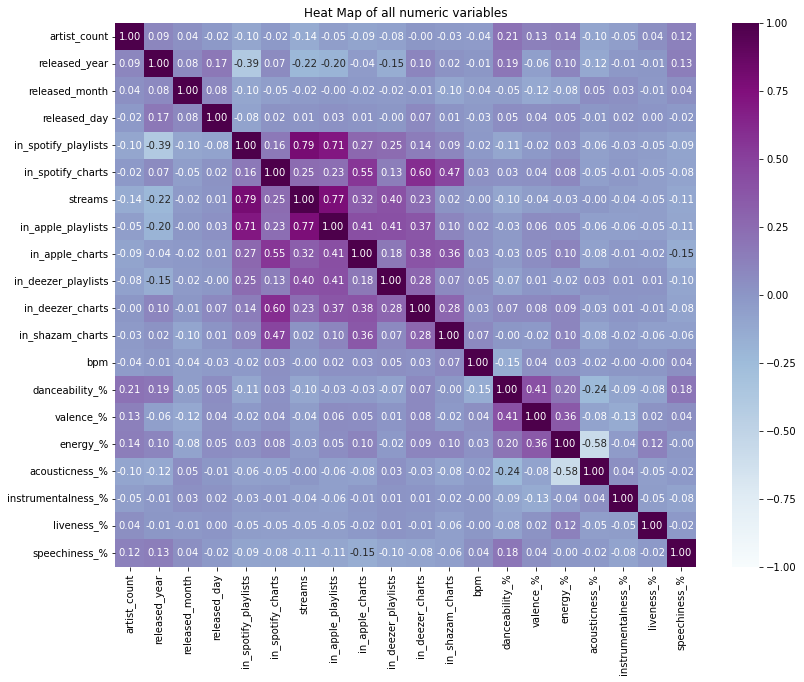

In [38]:
plt.figure(figsize = (13, 10))
sns.heatmap(corr_matrix, vmax=1, vmin=-1, center = 0, cmap='BuPu', fmt='.2f', annot=True)
plt.title('Heat Map of all numeric variables')

In [39]:
corr1 = ['in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
                'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']
corr2 = ['bpm', 'danceability_%','valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
          'liveness_%', 'speechiness_%']

In [40]:
corr_matrix1 = df[corr1].corr(method='pearson')
corr_matrix2 = df[corr2].corr(method='pearson')

Text(0.5, 1.0, 'Heat Map of variables connected to streams')

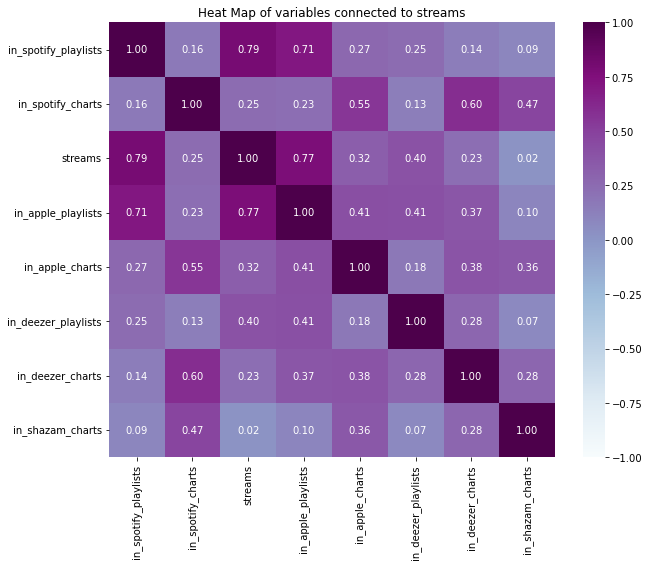

In [41]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix1, vmax=1, vmin=-1, center=0, cmap='BuPu', fmt='.2f', annot=True)
plt.title('Heat Map of variables connected to streams')

Widać dużą korelację pomiędzy streams i obecnością w spotify playlist i apple playlists, oraz pomiedzy piosenkami które sa w apple charts i spotify.

Text(0.5, 1.0, 'Heat Map of variables connected to type of music')

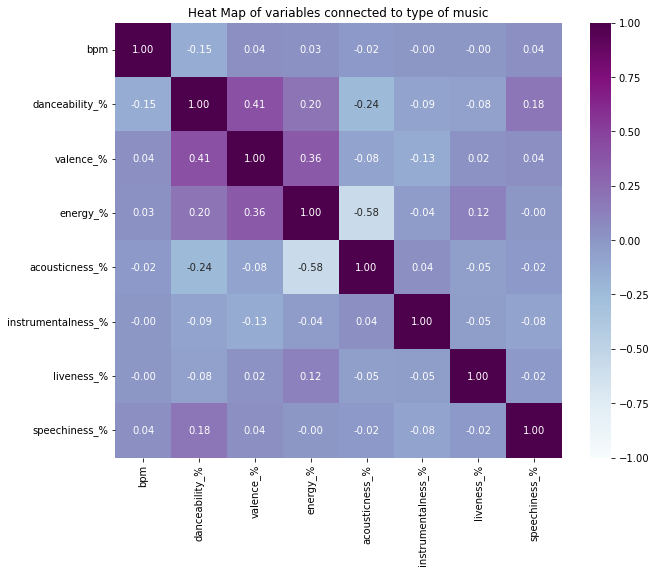

In [43]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix2, vmax=1, vmin=-1, center=0, cmap='BuPu', fmt='.2f', annot=True)
plt.title('Heat Map of variables connected to type of music')

Widać korelacje pomiędzy danceability, valence i energy oraz ujemną korelacje pomiędzy acousticness i energy.

In [44]:
continous_cols = ['in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
                'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%',
                'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

In [45]:
discrete_cols = ['artist_count', 'released_year', 'released_month', 'released_day']

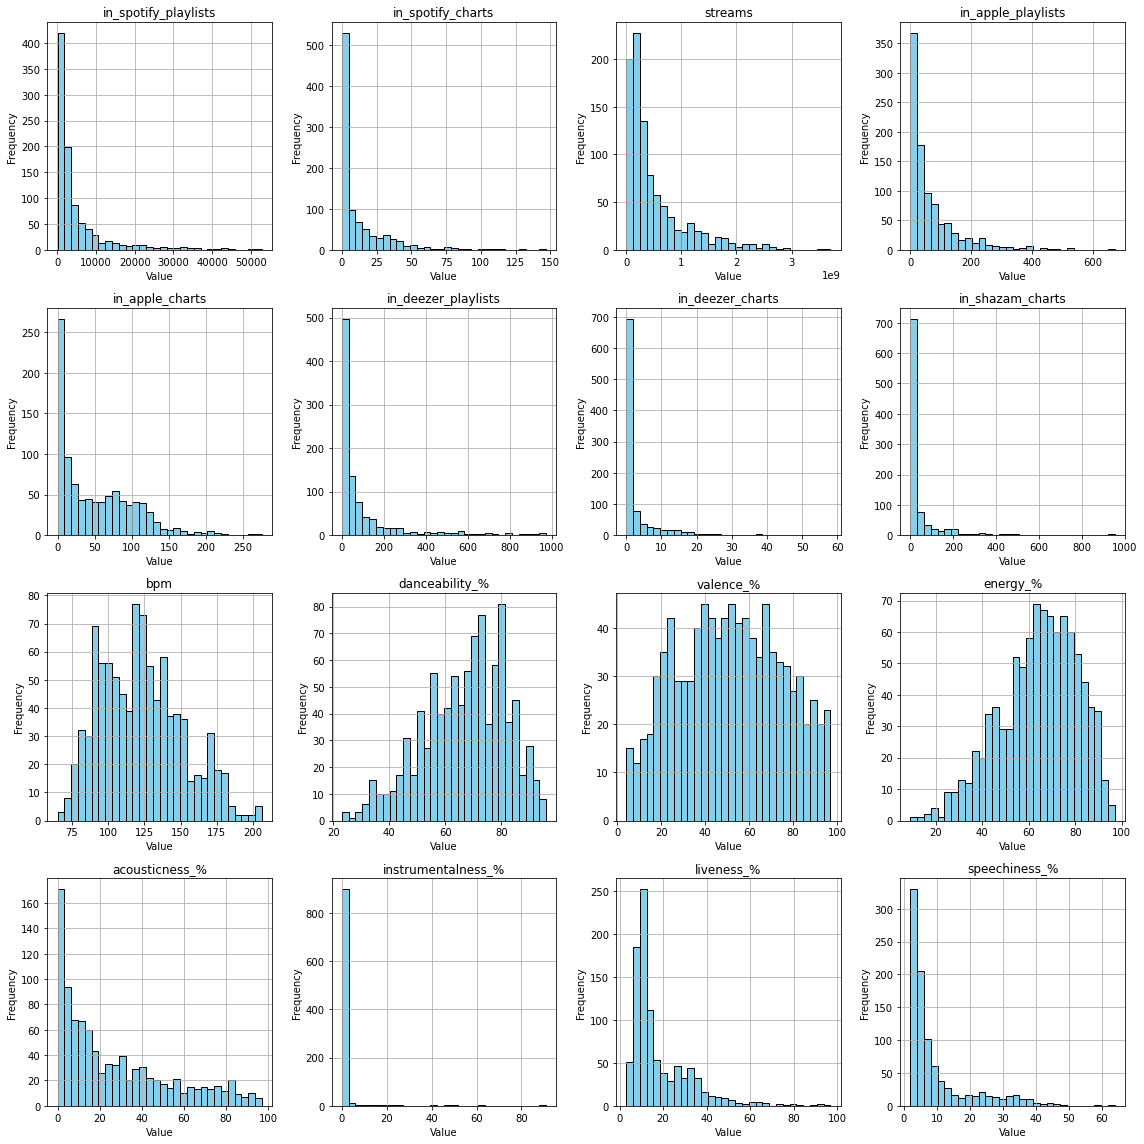

In [46]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))


axs = axs.flatten()


for i, col in enumerate(continous_cols):
    axs[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')  
    axs[i].set_title(col)  
    axs[i].set_xlabel('Value')  
    axs[i].set_ylabel('Frequency')  
    axs[i].grid(True) 


plt.tight_layout()
plt.show()  

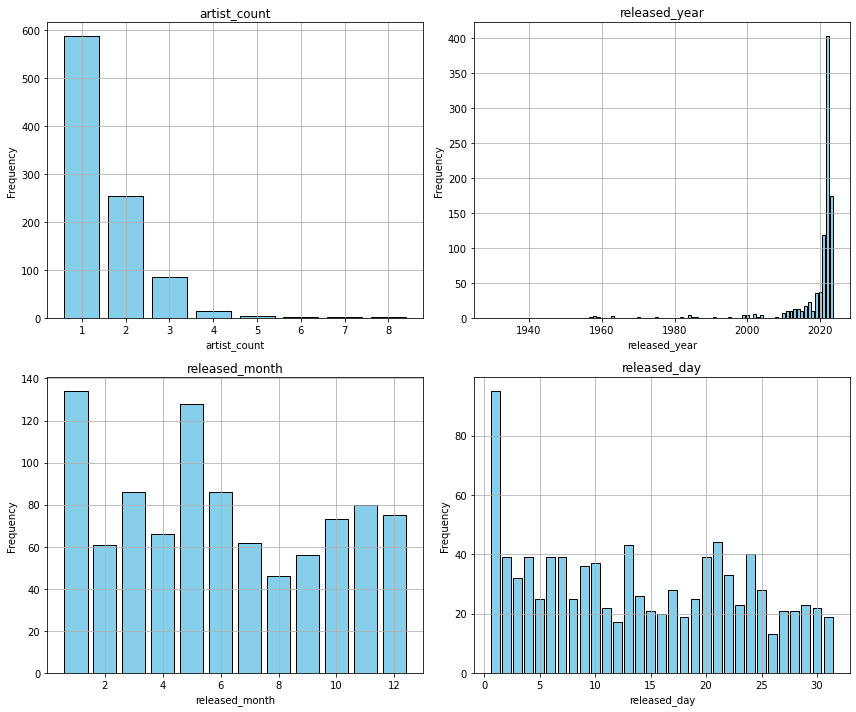

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs = axs.flatten()


for i, col in enumerate(discrete_cols):
    counts = df[col].value_counts()
    axs[i].bar(counts.index, counts.values, color='skyblue', edgecolor='black')  
    axs[i].set_title(col)  
    axs[i].set_xlabel(col)  
    axs[i].set_ylabel('Frequency')  
    axs[i].grid(True)  


plt.tight_layout()
plt.show() 

Text(0.5, 1.0, 'Distribution of streams among artist count')

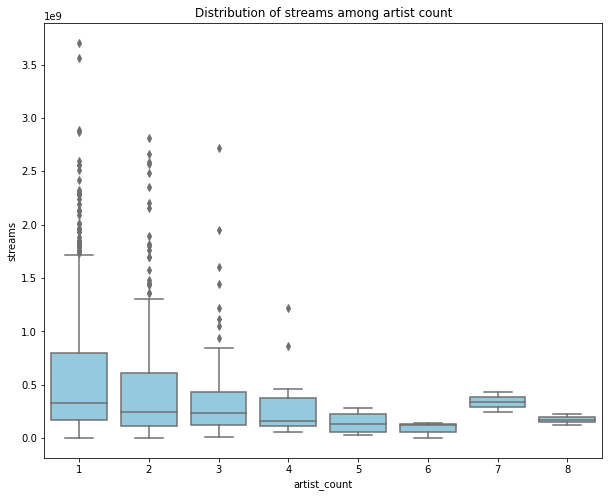

In [48]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x='artist_count', y='streams',color='skyblue')
plt.title('Distribution of streams among artist count')

Widać, że bardzo popularne piosenki (które mają dużo streams), są najczęściej stworzone przez 1 lub 2 artystów.

In [50]:
df['5YearRange'] = df['released_year'] // 5 * 5
df['10YearRange'] = df['released_year'] // 10 * 10

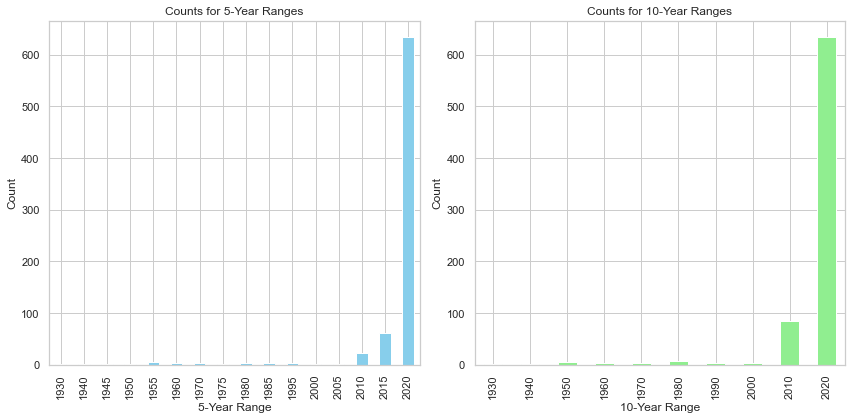

In [128]:
counts_5year = df['5YearRange'].value_counts().sort_index()
counts_10year = df['10YearRange'].value_counts().sort_index()

# Tworzenie wykresu słupkowego
plt.figure(figsize=(12, 6))

# Wykres dla '5YearRange'
plt.subplot(1, 2, 1)
counts_5year.plot(kind='bar', color='skyblue')
plt.title('Counts for 5-Year Ranges')
plt.xlabel('5-Year Range')
plt.ylabel('Count')
plt.grid(True)

# Wykres dla '10YearRange'
plt.subplot(1, 2, 2)
counts_10year.plot(kind='bar', color='lightgreen')
plt.title('Counts for 10-Year Ranges')
plt.xlabel('10-Year Range')
plt.ylabel('Count')
plt.grid(True)

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()

Większość piosenek jest z ostatniej dekady.

<AxesSubplot:xlabel='key', ylabel='streams'>

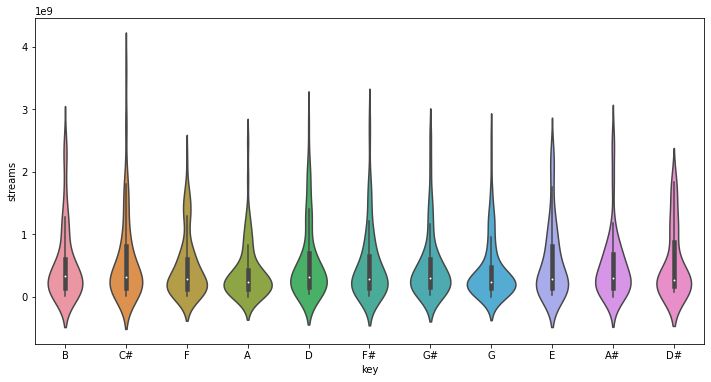

In [51]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='key', y='streams')

Rozkład tonacji jest bardzo podobny, jednak więcej popularnych piosenek ma C#

<AxesSubplot:xlabel='mode', ylabel='streams'>

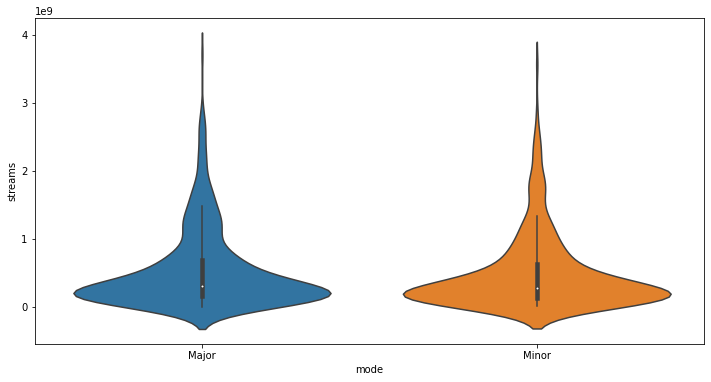

In [52]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='mode', y='streams')

Text(0.5, 1.0, 'Countplot of keys')

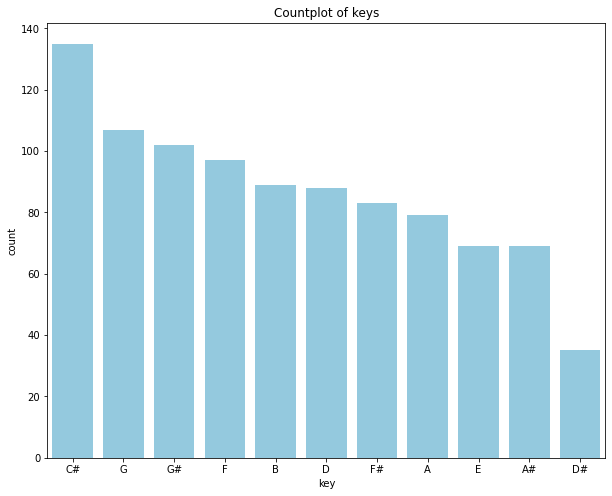

In [53]:
plt.figure(figsize=(10, 8))
sns.countplot(x="key", data=df, color='skyblue',  order=df['key'].value_counts().index)
plt.title('Countplot of keys')


### Analiza piosenek najbardziej popularnych (o największej liczbie streams)

In [54]:
df_sorted = df.sort_values(by='streams', ascending=False)
top_25_songs = df_sorted.head(25)
top_50_songs = df_sorted.head(50)
top_100_songs = df_sorted.head(100)

In [55]:
key_mode_counts_top_100 = top_100_songs.groupby(['key', 'mode']).size().reset_index(name='count').sort_values(by='count', ascending=False)

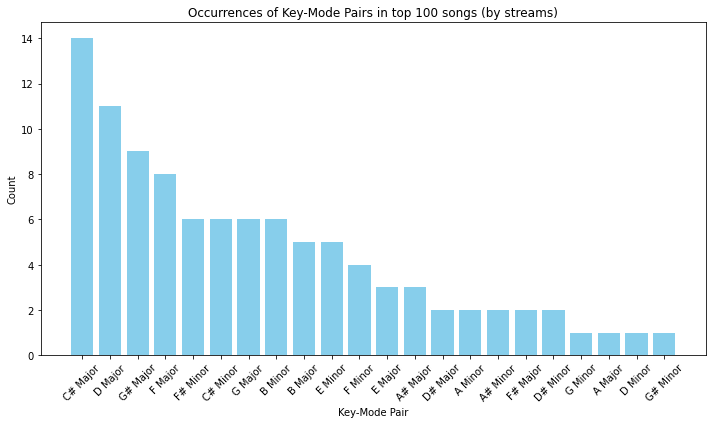

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(key_mode_counts_top_100['key'] + ' ' + key_mode_counts_top_100['mode'], key_mode_counts_top_100['count'], color='skyblue')
plt.xlabel('Key-Mode Pair')
plt.ylabel('Count')
plt.title('Occurrences of Key-Mode Pairs in top 100 songs (by streams)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

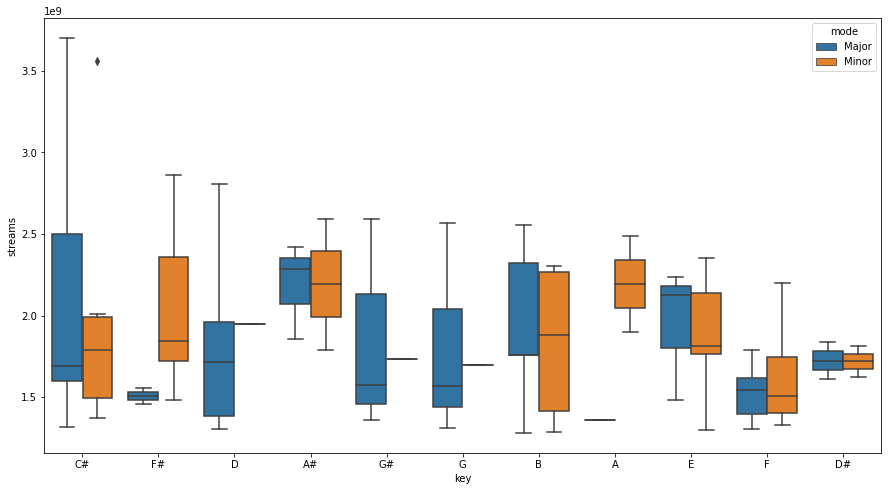

In [57]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=top_100_songs, x='key', y='streams', hue='mode')
plt.tight_layout

<AxesSubplot:xlabel='mode', ylabel='streams'>

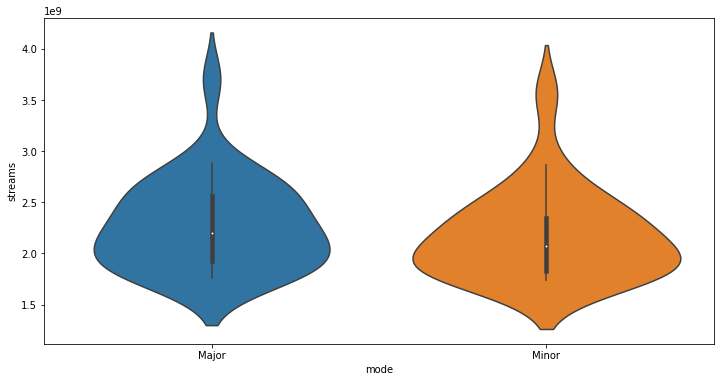

In [58]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=top_50_songs, x='mode', y='streams')

In [61]:
df['artist(s)_name'].value_counts().head(10)

Taylor Swift        34
The Weeknd          22
Bad Bunny           19
SZA                 19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
Feid                 8
Drake, 21 Savage     8
Name: artist(s)_name, dtype: Int64

Taylor Swift ma najwięcej piosenek w całym zestawieniu.

In [64]:
top_100_songs['artist(s)_name'].value_counts().head(10)

Ed Sheeran         6
The Weeknd         5
Harry Styles       3
Bruno Mars         3
Eminem             3
Arctic Monkeys     2
Lewis Capaldi      2
Imagine Dragons    2
Avicii             2
Olivia Rodrigo     2
Name: artist(s)_name, dtype: Int64

W top 100 songs Ed Sheeran ma najwięcej piosenek.

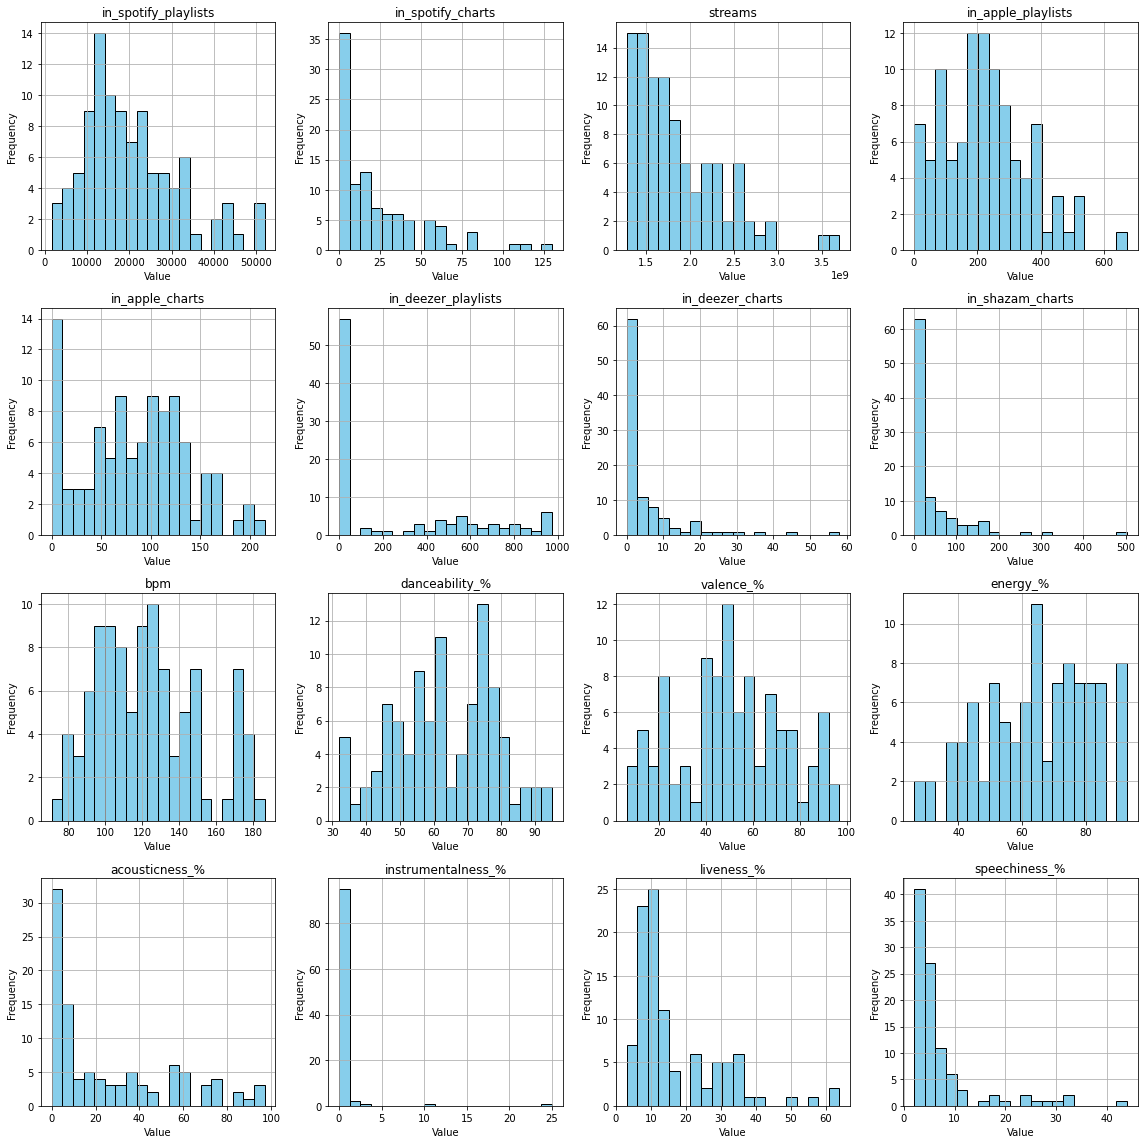

In [65]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))


axs = axs.flatten()


for i, col in enumerate(continous_cols):
    axs[i].hist(top_100_songs[col], bins=20, color='skyblue', edgecolor='black')  
    axs[i].set_title(col)  
    axs[i].set_xlabel('Value')  
    axs[i].set_ylabel('Frequency')  
    axs[i].grid(True) 


plt.tight_layout()
plt.show()  